1. **Temperature:** High temperatures can increase the rate of chemical reactions in the atmosphere, leading to the formation of pollutants such as ozone and particulate matter. However, temperature alone is not a direct indicator of air quality.

2. **Humidity:** High humidity levels can contribute to the formation of ground-level ozone and particulate matter. It can also affect the ability of pollutants to disperse, potentially leading to higher concentrations in the air.

3. **Pressure:** Changes in air pressure can impact the movement and dispersion of pollutants. Low-pressure systems may lead to the stagnation of pollutants near the ground, while high-pressure systems can help disperse pollutants.

4. **Wind Speed:** Higher wind speeds can help disperse pollutants and improve air quality by reducing their concentration in a specific area. However, strong winds can also transport pollutants from other areas, impacting air quality in downwind regions.

5. **Dew Point:** The dew point is the temperature at which air becomes saturated with water vapor. High dew points indicate high moisture levels, which can affect the formation of pollutants and overall air quality. High dew points can also lead to fog formation, which can trap pollutants near the ground.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('/content/AirQuality-LinearRegression.csv')
print(data)

           Date  Humidity  Wind Speed  Dew Point  Temperature  Pressure  AQI  \
0    01-10-2019      83.0         4.5       76.0         81.9      28.1   84   
1    02-10-2019      81.6         4.6       77.4         83.8      28.1   83   
2    03-10-2019      82.0         3.7       75.3         81.7      28.1   81   
3    04-10-2019      85.4         2.7       73.9         78.6      28.1   94   
4    05-10-2019      87.4         3.5       75.3         79.4      28.1  112   
..          ...       ...         ...        ...          ...       ...  ...   
148  26-04-2020      75.0         3.5       81.0         95.8      28.1   89   
149  27-04-2020      66.0         5.3       77.0         95.3      28.0   80   
150  28-04-2020      89.0         8.8       79.0         89.9      28.0   68   
151  29-04-2020      59.0         4.7       73.0         94.8      28.1   68   
152  30-04-2020      58.0         4.6       72.0         95.3      28.0   61   

     PM2.5  
0     35.5  
1     34.0  


In [90]:
X=data["Temperature"]
y=data["AQI"]
z=data["Humidity"]

In [105]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [108]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [109]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [110]:
#create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
X_test = np.array(X_test)

In [124]:
X_test = pd.Series(X_test)

In [125]:

X_test = X_test.values.reshape(-1, 1)

In [127]:
y_predict=model.predict(X_test)

In [128]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)


Mean Squared Error: 1101.864060701465


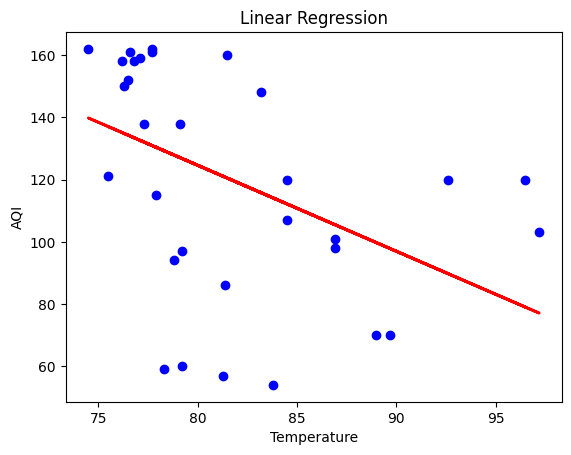

In [131]:
# Plot the data and regression line
import seaborn as sns
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('AQI')
plt.title('Linear Regression')
plt.show()

<ipython-input-132-9509e9b8ba66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


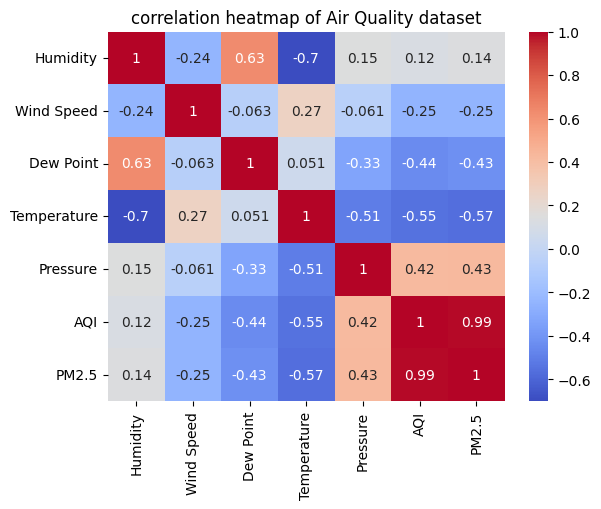

In [132]:
correlation_matrix=data.corr()
#create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("correlation heatmap of Air Quality dataset")
plt.show()

In [141]:
from sklearn.linear_model import LinearRegression
Temperature = float(input("Enter the Temperature:"))
X_test = [[Temperature]]
predicted_AQI = model.predict(X_test)
print("predicted AQI:", predicted_AQI )
if(predicted_AQI<=50):
  print("Air Quality is good")
elif(predicted_AQI>51 and predicted_AQI<=100):
  print("Air Quality is Moderate")
else:
  print("Air Quality is Bad")

Enter the Temperature:89
predicted AQI: [[99.73852649]]
Air Quality is Moderate
